In [1]:
from pyuvdata import UVCal
import pyuvdata.utils as uvutils
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
fhd_folder1 = "/Users/bryna/Projects/Physics/data_files/van_vleck_runs/fhd_van_vleck_cal2/"
obsname1 = "1061316296"
cal_file1 = os.path.join(fhd_folder1, "calibration", obsname1 + "_cal.sav")
obs_file1 = os.path.join(fhd_folder1, "metadata", obsname1 + "_obs.sav")
layout_file1 = os.path.join(fhd_folder1, "metadata", obsname1 + "_layout.sav")
settings_file1 = os.path.join(fhd_folder1, "metadata", obsname1 + "_settings.txt")

In [3]:
fhd_folder2 = "/Users/bryna/Projects/Physics/data_files/van_vleck_runs/fhd_van_vleck_cal3/"
obsname2 = "1061316296"
cal_file2 = os.path.join(fhd_folder2, "calibration", obsname2 + "_cal.sav")
obs_file2 = os.path.join(fhd_folder2, "metadata", obsname2 + "_obs.sav")
layout_file2 = os.path.join(fhd_folder2, "metadata", obsname2 + "_layout.sav")
settings_file2 = os.path.join(fhd_folder2, "metadata", obsname2 + "_settings.txt")

In [4]:
fhd_folder3 = "/Users/bryna/Projects/Physics/data_files/van_vleck_runs/fhd_van_vleck_cal1/"
obsname3 = "1061316296"
cal_file3 = os.path.join(fhd_folder3, "calibration", obsname3 + "_cal.sav")
obs_file3 = os.path.join(fhd_folder3, "metadata", obsname3 + "_obs.sav")
layout_file3 = os.path.join(fhd_folder3, "metadata", obsname3 + "_layout.sav")
settings_file3 = os.path.join(fhd_folder3, "metadata", obsname3 + "_settings.txt")

In [5]:
raw = False

calobj1 = UVCal()
calobj1.read_fhd_cal(cal_file1, obs_file1, settings_file=settings_file1, raw=raw)

calobj2 = UVCal()
calobj2.read_fhd_cal(cal_file2, obs_file2, settings_file=settings_file2, raw=raw)

calobj3 = UVCal()
calobj3.read_fhd_cal(cal_file3, obs_file3, settings_file=settings_file3, raw=raw)


mode_fit in extra_keywords is a list, array or dict, which will raise an error when writing calfits files


In [6]:
label1 = 'Li auto master'
label2 = 'Li auto fast'
label3 = 'Barry auto master'

In [7]:
freq_array_mhz = np.squeeze(calobj1.freq_array*1e-6)

In [8]:
all_ant_amp1 = np.ma.array(
    np.squeeze(np.abs(calobj1.gain_array)),
    mask = np.squeeze(np.abs(calobj1.flag_array))
)

all_ant_amp2 = np.ma.array(
    np.squeeze(np.abs(calobj2.gain_array)),
    mask = np.squeeze(np.abs(calobj2.flag_array))
)

all_ant_amp3 = np.ma.array(
    np.squeeze(np.abs(calobj3.gain_array)),
    mask = np.squeeze(np.abs(calobj3.flag_array))
)

In [20]:
all_ant_diff12 = all_ant_amp1 - all_ant_amp2

print(np.max(np.abs(all_ant_diff12)))

1.1190581008513334e-06


In [10]:
np.allclose(calobj1.flag_array, calobj2.flag_array)

True

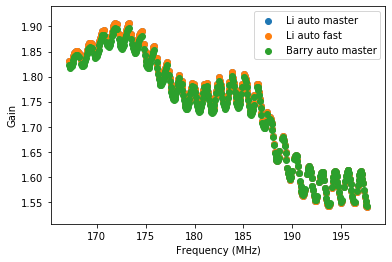

In [11]:
ant_num=0
amplitude1 = np.ma.array(
    np.squeeze(np.abs(calobj1.get_gains(ant_num))),
    mask = np.squeeze(np.abs(calobj1.get_flags(ant_num)))
)

amplitude2 = np.ma.array(
    np.squeeze(np.abs(calobj2.get_gains(ant_num))),
    mask = np.squeeze(np.abs(calobj2.get_flags(ant_num)))
)
amplitude3 = np.ma.array(
    np.squeeze(np.abs(calobj3.get_gains(ant_num))),
    mask = np.squeeze(np.abs(calobj3.get_flags(ant_num)))
)


plt.scatter(freq_array_mhz, amplitude1[:,0], label=label1)
plt.scatter(freq_array_mhz, amplitude2[:,0], label=label2)
plt.scatter(freq_array_mhz, amplitude3[:,0], label=label3)
plt.xlabel("Frequency (MHz)")
plt.ylabel("Gain")
# plt.ylim(0.015, 0.035)
plt.legend()





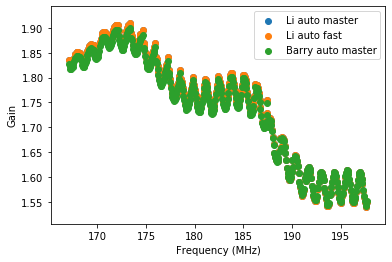

In [12]:
ant_num=0

amplitude1 = np.squeeze(np.abs(calobj1.get_gains(ant_num)))
amplitude2 = np.squeeze(np.abs(calobj2.get_gains(ant_num)))
amplitude3 = np.squeeze(np.abs(calobj3.get_gains(ant_num)))


plt.scatter(freq_array_mhz, amplitude1[:,0], label=label1)
plt.scatter(freq_array_mhz, amplitude2[:,0], label=label2)
plt.scatter(freq_array_mhz, amplitude3[:,0], label=label3)

plt.xlabel("Frequency (MHz)")
plt.ylabel("Gain")
# plt.ylim(0.01, 0.07)
plt.legend()


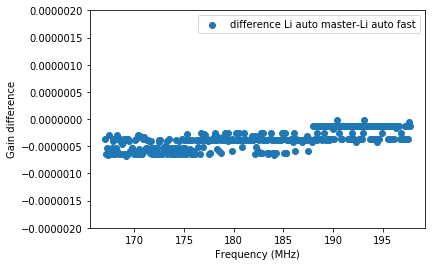

In [13]:
amplitude_diff_12 = amplitude1 - amplitude2

plt.scatter(freq_array_mhz, amplitude_diff_12[:,0], label='difference ' + label1 + "-" + label2, )

plt.xlabel("Frequency (MHz)")
plt.ylabel("Gain difference")
plt.ylim(-0.000002, 0.000002)
plt.legend()



In [19]:
np.max(np.abs(amplitude_diff_12))

6.761431576851606e-07

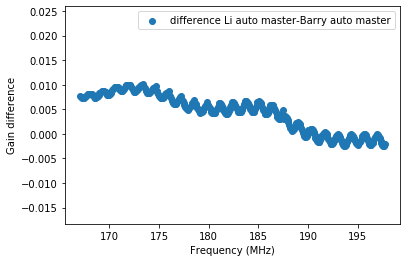

In [15]:
amplitude_diff_13 = amplitude1 - amplitude3

plt.scatter(freq_array_mhz, amplitude_diff_13[:,0], label='difference ' + label1 + "-" + label3, )

plt.xlabel("Frequency (MHz)")
plt.ylabel("Gain difference")
# plt.ylim(-0.0000002, 0.0000002)
plt.legend()



In [16]:
np.max(np.abs(amplitude_diff_13) / amplitude1)

0.005306730471111153

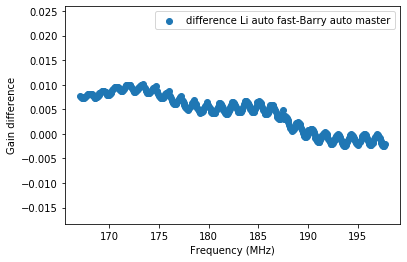

In [17]:
amplitude_diff_23 = amplitude2 - amplitude3

plt.scatter(freq_array_mhz, amplitude_diff_13[:,0], label='difference ' + label2 + "-" + label3, )

plt.xlabel("Frequency (MHz)")
plt.ylabel("Gain difference")
# plt.ylim(-0.0000002, 0.0000002)
plt.legend()



In [18]:
np.abs(amplitude_diff_23[0,0]) / amplitude2[0,0]

0.0041450865362391304